In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc



In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/MyDrive/Machine Learning Project/dataset gender 3.npz"
data = np.load(file_path)

X = data["features"]  # Assuming features are stored under the key "features"
y = data["labels"]    # Assuming labels are stored under the key "labels"

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define classifiers
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}



Mounted at /content/drive


Training KNN...
KNN Results:
F1 Score: 0.7363
Recall: 0.7473
Precision: 0.7256
Confusion Matrix:
[[6093 2911]
 [2603 7699]]


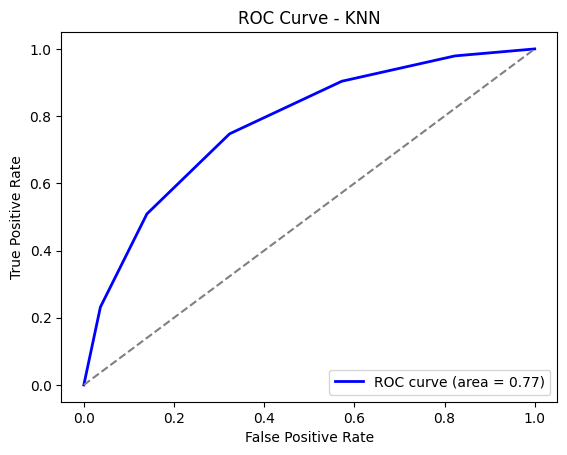

Training SVM...
SVM Results:
F1 Score: 0.8361
Recall: 0.8535
Precision: 0.8194
Confusion Matrix:
[[7066 1938]
 [1509 8793]]


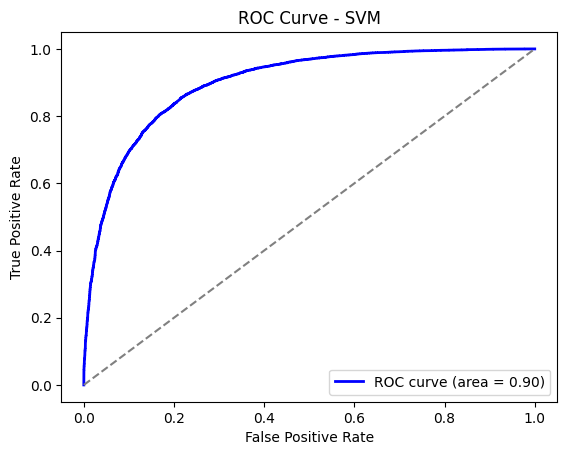

Training MLP...
MLP Results:
F1 Score: 0.7938
Recall: 0.7925
Precision: 0.7952
Confusion Matrix:
[[6901 2103]
 [2138 8164]]


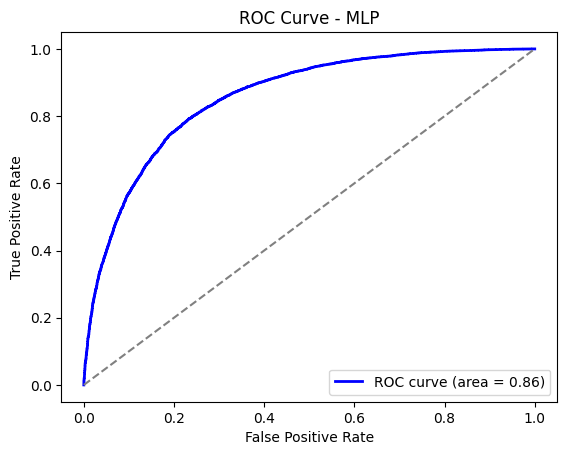

In [3]:
# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    f1 = f1_score(y_test, y_pred, pos_label='male')
    recall = recall_score(y_test, y_pred, pos_label = 'male')
    precision = precision_score(y_test, y_pred, pos_label = 'male')
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} Results:")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="male")
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()


Training MLP...
MLP Results:
F1 Score: 0.8259
Recall: 0.8160
Precision: 0.8362
Confusion Matrix:
[[7357 1647]
 [1896 8406]]


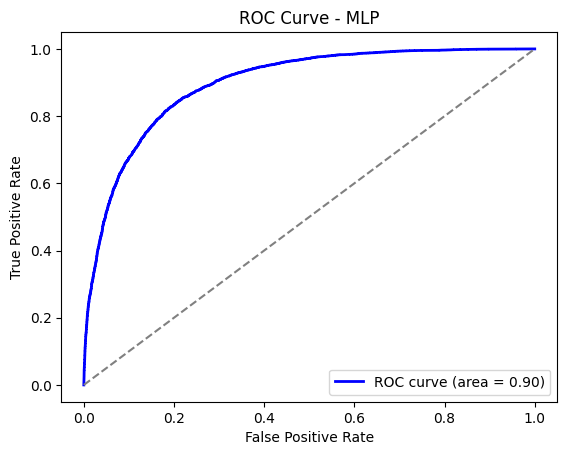

In [7]:
# Train and evaluate models
name = 'MLP'
model = MLPClassifier(hidden_layer_sizes=(1024, 256, 64), max_iter=500, random_state=42)
print(f"Training {name}...")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

# Metrics
f1 = f1_score(y_test, y_pred, pos_label='male')
recall = recall_score(y_test, y_pred, pos_label = 'male')
precision = precision_score(y_test, y_pred, pos_label = 'male')
cm = confusion_matrix(y_test, y_pred)

print(f"{name} Results:")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot ROC Curve
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="male")
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()


Training MLP...
MLP Results:
F1 Score: 0.8275
Recall: 0.8291
Precision: 0.8259
Confusion Matrix:
[[7203 1801]
 [1761 8541]]


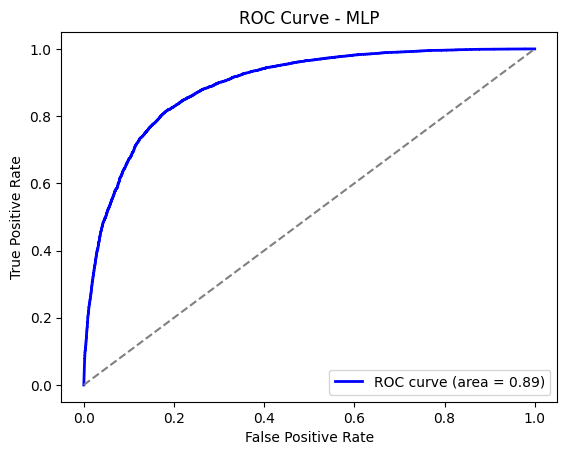

In [8]:
# Train and evaluate models
name = 'MLP'
model = MLPClassifier(hidden_layer_sizes=(1024, 512, 128), max_iter=500, random_state=42)
print(f"Training {name}...")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

# Metrics
f1 = f1_score(y_test, y_pred, pos_label='male')
recall = recall_score(y_test, y_pred, pos_label = 'male')
precision = precision_score(y_test, y_pred, pos_label = 'male')
cm = confusion_matrix(y_test, y_pred)

print(f"{name} Results:")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot ROC Curve
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="male")
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()
